# Graded Lab: Comprehensive EDA Challenge 

## Overview 
Welcome to your comprehensive data analysis challenge! In this lab, you'll apply your Python data science skills to solve a complex healthcare analytics problem through both required and extended analysis tasks.<br>
As a data scientist on MediTrack's analytics team, you're tasked with transforming their vast healthcare data into actionable insights. MediTrack's platform integrates electronic health records, billing systems, and patient visit histories to revolutionize healthcare delivery. However, they need your expertise to uncover patterns and trends that will optimize their operations.


### Your Challenge 
The Chief Medical Officer and Financial Director have requested a comprehensive analysis that will:
- Identify patterns in patient demographics and health conditions
- Analyze the effectiveness of insurance coverage
- Track billing efficiency and payment patterns
- Create interactive dashboards for real-time decision support

This lab consists of two crucial parts:

<b>Part 1 (Graded):</b>

You'll conduct a comprehensive EDA focusing on:
- Patient demographic analysis
- Financial pattern identification
- Correlation studies between health conditions and costs
- Static visualization development for key metrics

<b>Part 2 (Ungraded):</b>

You'll extend your analysis by:
- Creating interactive dashboards for dynamic data exploration
- Developing real-time filtering mechanisms
- Building user-friendly interfaces for medical staff

### Learning Outcomes 
By completing this analysis, you will:
- Generate actionable healthcare insights through comprehensive EDA
- Create dynamic visualizations for stakeholder communication
- Identify patterns in patient care and financial data
- Develop interactive tools for healthcare decision-makers

## Getting Started 


In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'
from plotly.subplots import make_subplots
#from plotchecker import PlotChecker


# Set visualization preferences
sns.set_style('whitegrid') 

# Part 1: Graded Challenges - Comprehensive EDA  

## Graded Challenge 1: Data Integration and Initial Analysis

As MediTrack's data scientist, establish a foundation for analysis by:
- Loading and validating all data sources
- Generating comprehensive statistical summaries
- Identifying data quality issues

In [2]:
# Load billing.csv and patients.csv in dataframes billing_df and patients_df respectively and generate basic statistics

# Load the datasets
billing_df = pd.read_csv('billing.csv')
patients_df = pd.read_csv('patients.csv')

# Display basic info for each dataset
print("Billing Data Info:")
billing_df.info()
print("\nBilling Data - First 5 Rows:")
print(billing_df.head())

print("\nPatients Data Info:")
patients_df.info()
print("\nPatients Data - First 5 Rows:")
print(patients_df.head())

# Summary statistics
print("\nBilling Data - Summary Statistics:")
print(billing_df.describe(include='all'))

print("\nPatients Data - Summary Statistics:")
print(patients_df.describe(include='all'))


Billing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_id             1000 non-null   int64  
 1   patient_id          1000 non-null   int64  
 2   bill_date           950 non-null    object 
 3   total_charge        1000 non-null   float64
 4   insurance_coverage  1000 non-null   float64
 5   patient_paid        1000 non-null   float64
 6   payment_status      950 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB

Billing Data - First 5 Rows:
   bill_id  patient_id   bill_date  total_charge  insurance_coverage  \
0    30000        1143  2023-01-15       1563.49            0.539973   
1    30001        1023  2023-01-16       4348.01            0.822007   
2    30002        1452  2023-01-17       3759.04            0.647955   
3    30003        1424  2023-01-18       4303.05      

In [3]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 1: Dataframes and Appropriate statistic calculations

## Graded Challenge 2: Patient Population Analysis

The Medical Director needs insights about patient demographics to optimize care delivery. Create demographic visualizations that show:
- Age distribution across insurance types
- Gender distribution by pre-existing conditions
- Insurance coverage distribution 

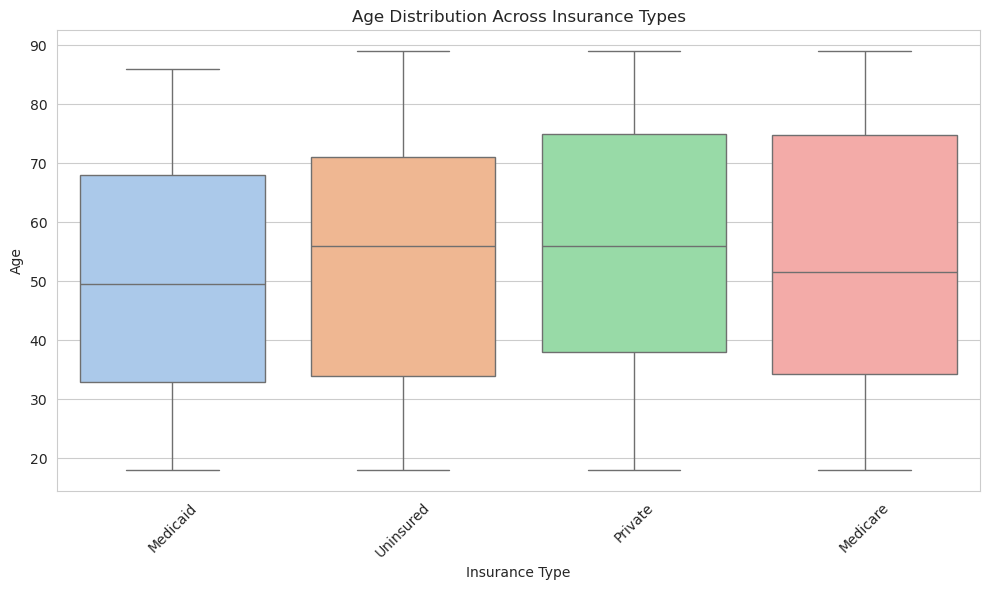

In [4]:
# Create a box plot that shows age distribution across insurance types.
# Do not change the function name

def age_distribution(): 
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=patients_df, x='insurance_type', y='age', palette='pastel')
    plt.title('Age Distribution Across Insurance Types')
    plt.xlabel('Insurance Type')
    plt.ylabel('Age')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

age_distribution()


In [5]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 2A: Age distribution across Insurance Types Box plot

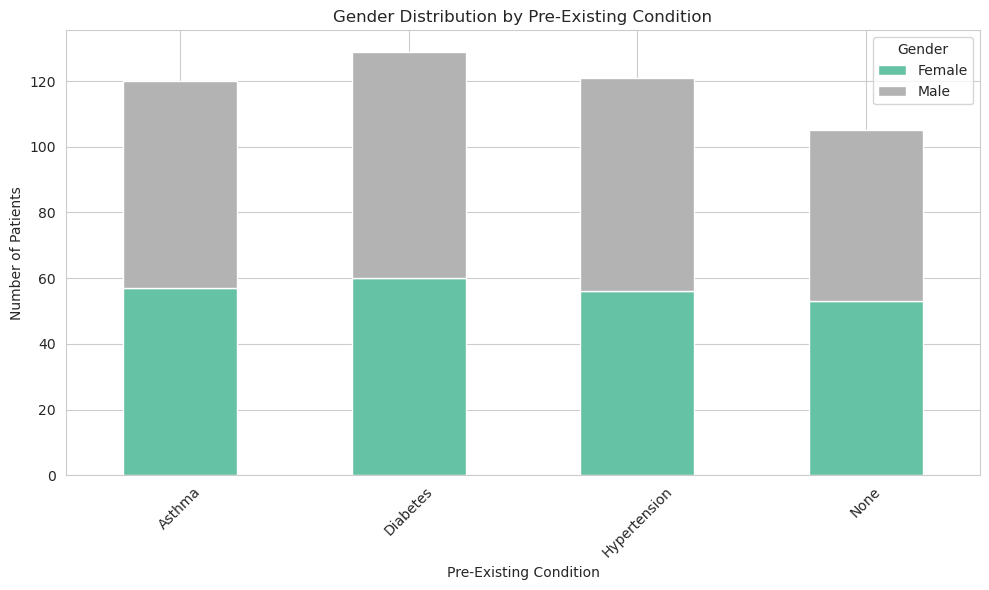

In [6]:
# Create a stacked bar chart showing gender distribution by pre-existing conditions.
# Each bar should represent a condition, segmented by gender.
# Do not change the function name.

def gender_distribution():
    # Create a count table: rows = pre-existing conditions, columns = genders
    gender_counts = patients_df.groupby(['pre_existing_condition', 'gender']).size().unstack().fillna(0)
    
    # Plotting
    gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

    plt.title('Gender Distribution by Pre-Existing Condition')
    plt.xlabel('Pre-Existing Condition')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

gender_distribution()


In [7]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 2B: Gender by Condition Bar Chart

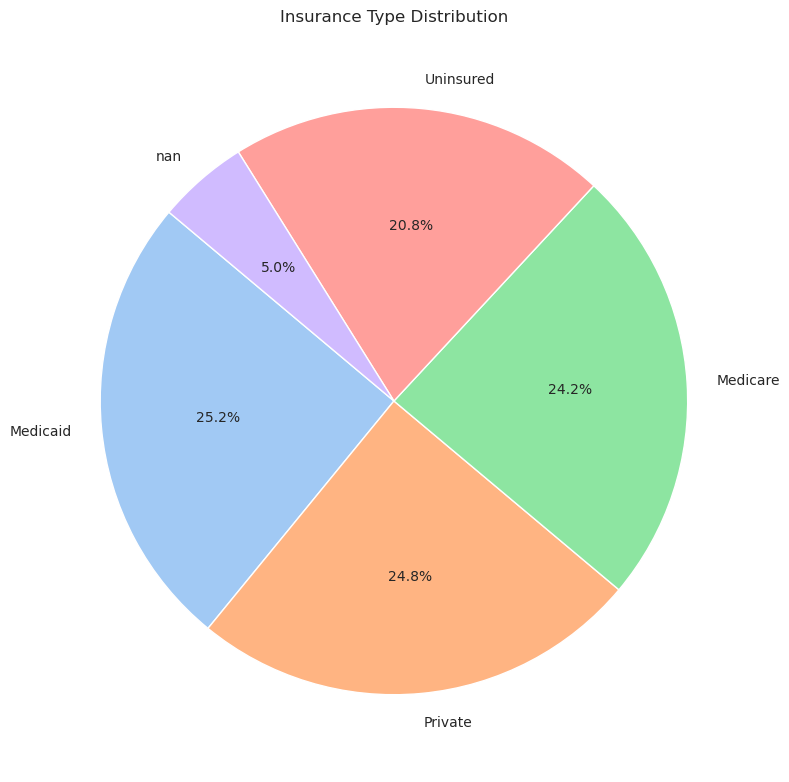

In [8]:
# Create a pie chart to show Insurance coverage distribution 
# Do not change the function name

def insurance_distribution(): 
    # Count each insurance type
    insurance_counts = patients_df['insurance_type'].value_counts(dropna=False)

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Insurance Type Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
    plt.tight_layout()
    plt.show()

insurance_distribution()


In [9]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 2C: Insurance Coverage Pie Chart

## Graded Challenge 3: Financial Pattern Analysis

The Finance Team needs to understand billing efficiency.Analyze:
- Average charges for different conditions
- Payment status distributions

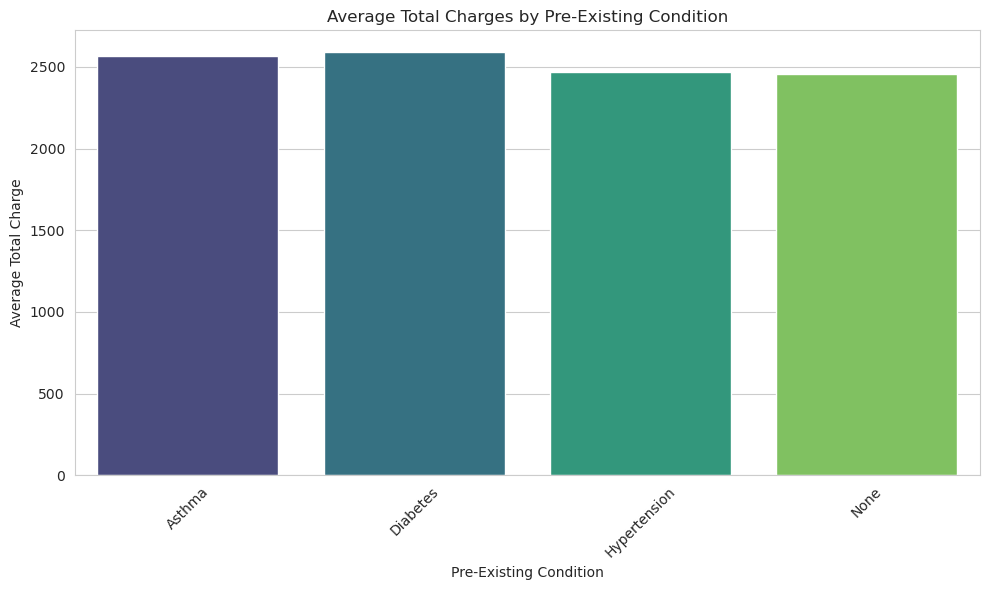

In [10]:
# Create a bar plot that shows average charges by condition. 
# 1. Calculate Average charges for each condition
# 2. Then, create a bar plot using seaborn

def average_charges_distribution():
    # Merge billing and patient data on patient_id
    merged_df = pd.merge(billing_df, patients_df, on='patient_id', how='inner')

    # Group by condition and calculate average total charge
    avg_charges = merged_df.groupby('pre_existing_condition')['total_charge'].mean().reset_index()

    # Plot the results
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_charges, x='pre_existing_condition', y='total_charge', palette='viridis')
    plt.title('Average Total Charges by Pre-Existing Condition')
    plt.xlabel('Pre-Existing Condition')
    plt.ylabel('Average Total Charge')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

average_charges_distribution()


In [11]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 3A: Average Charges by Pre-existing Condition

In [12]:
billing_df

,bill_id,patient_id,bill_date,total_charge,insurance_coverage,patient_paid,payment_status
0,30000,1143,2023-01-15,1563.49,0.539973,719.25,Denied
1,30001,1023,2023-01-16,4348.01,0.822007,773.92,Pending
2,30002,1452,2023-01-17,3759.04,0.647955,1323.35,Paid
3,30003,1424,2023-01-18,4303.05,0.759414,1035.26,Denied
4,30004,1233,2023-01-19,2525.42,0.790156,529.94,NaN
...,...,...,...,...,...,...,...
995,30995,1313,2025-10-06,1397.84,0.890565,152.97,Pending
996,30996,1145,2025-10-07,1814.32,0.612504,703.04,Paid
997,30997,1322,2025-10-08,3570.79,0.881374,423.59,Paid
998,30998,1121,2025-10-09,1902.45,0.521418,910.48,Paid


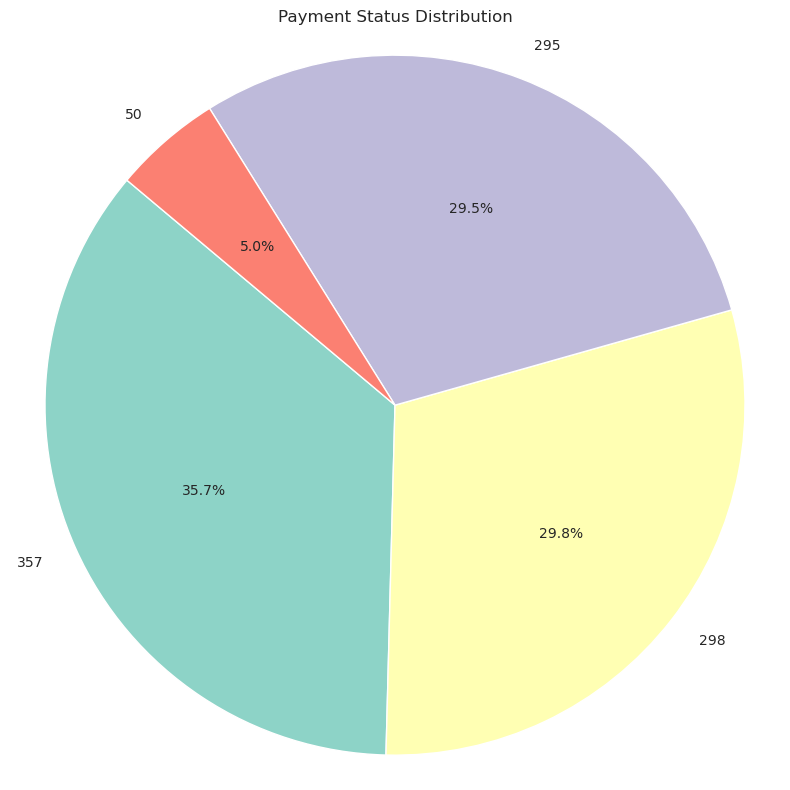

In [13]:
# Create a pie chart that shows payment status distribution
# Do not change the function name

def payment_status_distribution():
    # Count payment status values, including missing values
    status_counts = billing_df['payment_status'].value_counts(dropna=False)
    
    # print(status_counts)

    # Define labels (replace NaN with 'Missing')
    labels = status_counts.replace('nan', 'Missing')

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
    plt.title('Payment Status Distribution')
    plt.axis('equal')  # Equal aspect ratio for a perfect circle
    plt.tight_layout()
    plt.show()

payment_status_distribution()


In [14]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 3B: Payment Status Pie Chart

## Graded Challenge 4: Healthcare Metrics Correlation

Analyze how patient characteristics, insurance coverage, and pre-existing conditions correlate with healthcare charges and billing outcomes.
- Merge the patient and billing datasets using a common key, into a dataframe called <b>merged_df</b>
- Focus on numeric columns for correlation analysis.
- Create and visualize a correlation matrix to identify significant relationships.

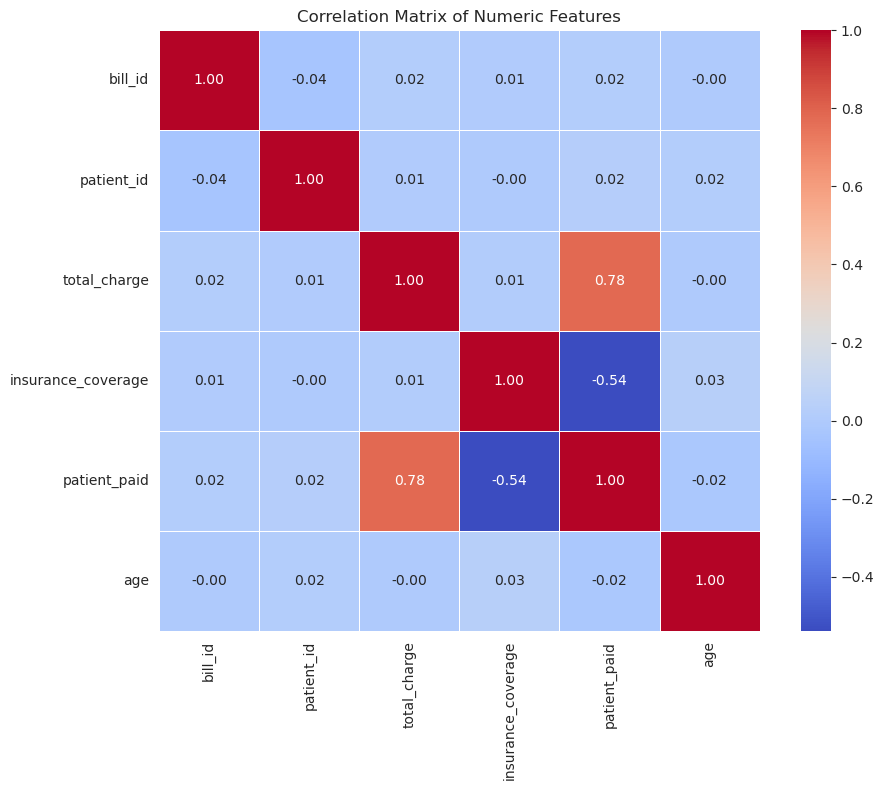

In [15]:
# Merge datasets for correlation analysis into a dataframe called "merged_df"

# YOUR CODE HERE

# Then, create and visualize a heatmap for correlation matrix
# Merge the datasets on patient_id
merged_df = pd.merge(billing_df, patients_df, on='patient_id', how='inner')

def correlation_analysis():
    # Select only numeric columns for correlation
    numeric_cols = merged_df.select_dtypes(include=[np.number])
    
    # Compute correlation matrix
    corr_matrix = numeric_cols.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

correlation_analysis()


In [16]:
# This cell contains test cases. Do not edit this cell.
# NBGRADER TEST - 4A: Correlation Matrix Heatmap

# Part 2: Ungraded Interactive Visualization Extension 

## Activities

### Activity 1: Interactive Patient Analytics

In [17]:
# Create a dynamic scatter to explore patient demographics and billing data.
# Include hover information on:
# - Insurance types

pio.renderers.default = 'iframe_connected'

# Ensure merged_df is available
merged_df = pd.merge(billing_df, patients_df, on='patient_id', how='inner')

# Create interactive scatter plot
fig = px.scatter(
    merged_df,
    x='age',
    y='total_charge',
    color='insurance_type',
    hover_data=['name', 'insurance_type', 'pre_existing_condition', 'gender'],
    title='Patient Demographics vs. Total Charges',
    labels={'age': 'Patient Age', 'total_charge': 'Total Medical Charges'},
    template='plotly_white'
)

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Insurance Type')

fig.show()


### Activity 2: Financial Insights 

In [18]:
# Develop an interactive billing analysis 
# Feature requirements:
# - Age
# - Gender

# Merge datasets if not already done
merged_df = pd.merge(billing_df, patients_df, on='patient_id', how='inner')

# Create interactive scatter plot
fig = px.scatter(
    merged_df,
    x='age',
    y='total_charge',
    color='gender',
    hover_data=['name', 'insurance_type', 'pre_existing_condition', 'patient_paid'],
    title='Interactive Billing Analysis by Age and Gender',
    labels={'age': 'Age', 'total_charge': 'Total Charge'},
    template='plotly_white',
    symbol='gender'
)

# Update marker style
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Gender')

# Show plot
fig.show()



## Verify Your Results

Before submission, verify your analysis meets these requirements:

Data Integration & Initial Analysis:
- Both datasets successfully loaded
- All data types correctly identified
- Complete summary statistics generated
- Missing values properly documented

Patient Demographics Analysis:
- Age distribution visualization present
- Gender breakdown complete
- Insurance type distribution shown
- Pre-existing conditions analyzed

Financial Pattern Analysis:
- Average charges calculated correctly
- Payment status distributions visualized
- Insurance coverage patterns identified
- Temporal trends documented

Correlation Analysis:
- Correlation matrix properly calculated
- Key relationships visualized
- Statistical significance noted
- Insights documented

## Troubleshooting
If you encounter issues, check these common problems and solutions:

Data Loading Issues:
- Verify file paths and names
- Check for proper encoding
- Confirm data types match expected format

Visualization Problems:
- Ensure all required libraries are imported
- Check for proper figure sizes
- Verify color schemes are appropriate
- Confirm axes labels are readable

Analysis Errors:
- Review calculations for mathematical accuracy
- Check for proper handling of missing values
- Verify grouping operations
- Confirm correlation calculations

Documentation Issues:
- Ensure all insights are clearly written
- Check that visualizations have proper titles and labels
- Verify that findings are supported by data
- Confirm all required components are included